In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handle Missing Values

In [10]:
# df.isna().sum()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Drop
# - Check if we have to drop row wise or col wise
# - We can put a threshold. Col exceeding the threshold could be dropped

# Fill
# - If column is having some importance then we should replace null values with mean, median, 0(but depends on situation)
# - replace null value with previous value or next value

In [12]:
# filling na values with 0
df.fillna(0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [15]:
# filling na values with previous one
df.fillna(method="pad").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [16]:
# filling na values with next one
df.fillna(method="bfill").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [20]:
# Handling categorical data - replace with most frequent values
imputer = SimpleImputer(strategy='most_frequent')
Cabin = imputer.fit_transform(df['Cabin'].values.reshape(-1,1))

In [21]:
Cabin[:5]

array([['B96 B98'],
       ['C85'],
       ['B96 B98'],
       ['C123'],
       ['B96 B98']], dtype=object)

In [23]:
df['Cabin'] = Cabin

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [27]:
# Handle Missing values in Numerical Col
imputer = SimpleImputer(strategy="mean")
Age = imputer.fit_transform(df['Age'].values.reshape(-1, 1))

In [28]:
Age[:5]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.]])

In [29]:
df['Age'] = Age

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [31]:
# Drop null values

# drop col with all null values
# df.dropna(axis=1, how='all')

df.dropna(axis=0, inplace=True)

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
df.shape

(889, 12)

# Outlier Detection and Removal

<Axes: >

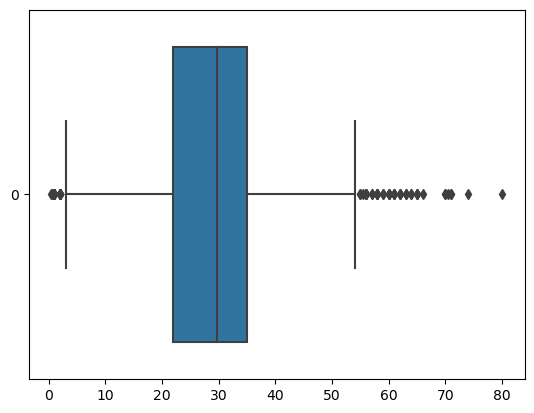

In [40]:
sns.boxplot(data = df['Age'], orient="h")

<Axes: xlabel='Age', ylabel='Count'>

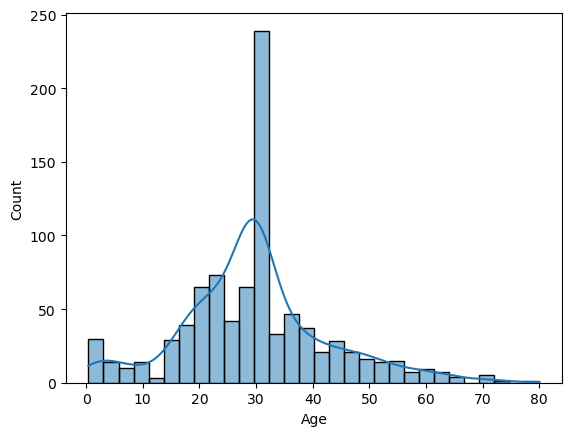

In [41]:
sns.histplot(df['Age'], kde=True)

In [42]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

In [43]:
q1, q3

(22.0, 35.0)

In [44]:
IQR = q3 - q1

In [45]:
IQR

13.0

In [46]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

In [47]:
upper_limit, lower_limit

(54.5, 2.5)

In [50]:
df[df['Age'] > upper_limit]['Age'].count()

41

In [51]:
df[df['Age'] < lower_limit]['Age'].count()

24

In [52]:
# Trimming
# - remove outliers from data

# Capping
# - impute the outlies with upper/lower values

In [54]:
# Capping
new_df = df.copy()
new_df['Age'] = np.where(new_df['Age'] > upper_limit, upper_limit, new_df['Age'])
new_df['Age'] = np.where(new_df['Age'] < lower_limit, lower_limit, new_df['Age'])

In [57]:
new_df[new_df['Age'] > upper_limit]['Age'].count()

0

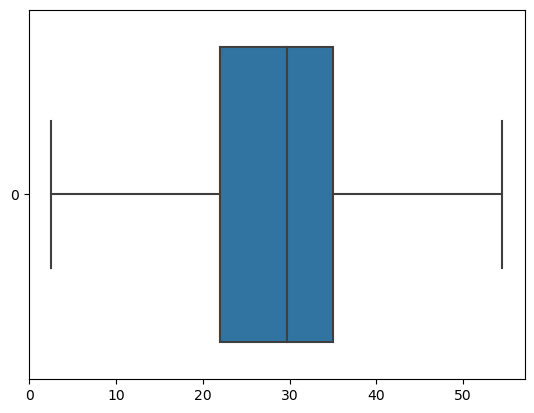

In [59]:
sns.boxplot(data = new_df['Age'], orient="h")
plt.show()

# Label Encoding

In [60]:
# Label Encoding can be used in caetgorical column
pd.value_counts(new_df['Sex'])

male      577
female    312
Name: Sex, dtype: int64

In [61]:
pd.value_counts(new_df['Embarked'])

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
label = LabelEncoder()
new_df['Sex'] = label.fit_transform(new_df['Sex'])

In [63]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


In [64]:
pd.value_counts(new_df['Sex'])

1    577
0    312
Name: Sex, dtype: int64

In [66]:
# One Hot Encoding
embarked_dummies = pd.get_dummies(new_df['Embarked'])

In [67]:
new_df.drop(columns=['Embarked'], inplace=True)

In [70]:
# new_df.isna().sum()

In [72]:
embarked_dummies.shape

(889, 3)

In [73]:
new_df.shape

(889, 11)

In [75]:
new_df = new_df.join(embarked_dummies)

In [76]:
new_df.shape

(889, 14)

In [77]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,0,0,1


# Feature Scaling

In [79]:
# Feature Scaling
# - scaling data in a range like 0 to 1

# Two types of scaling techniques
# - Normalization - scale values between 0 and 1
# - Standardization - scale values according to normal distribution

In [82]:
# Normalization
minmax = MinMaxScaler()
age_norm = minmax.fit_transform(df['Age'].values.reshape(-1,1))

In [83]:
age_norm[:10]

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [0.36792055],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589]])

In [84]:
# Standardization
std_scaler = StandardScaler()
age_stan = std_scaler.fit_transform(df['Age'].values.reshape(-1,1))

In [85]:
age_stan[:10]

array([[-0.59049493],
       [ 0.64397101],
       [-0.28187844],
       [ 0.41250865],
       [ 0.41250865],
       [ 0.00352373],
       [ 1.87843695],
       [-2.13357735],
       [-0.20472432],
       [-1.2077279 ]])

<Axes: ylabel='Count'>

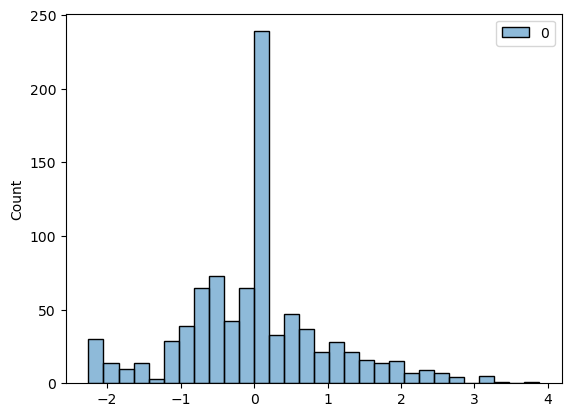

In [86]:
sns.histplot(age_stan)

<Axes: ylabel='Count'>

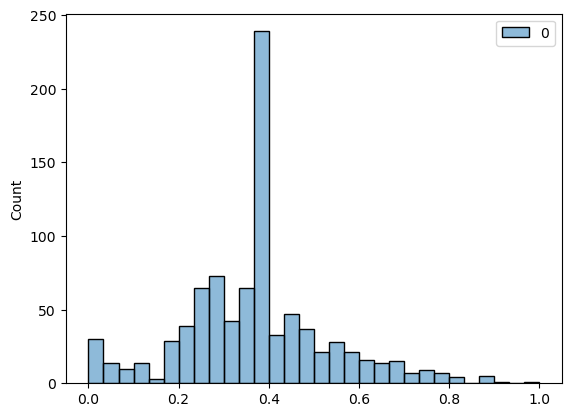

In [87]:
sns.histplot(age_norm)

In [88]:
new_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'C', 'Q', 'S'],
      dtype='object')

In [89]:
new_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [90]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# Train Test Split

In [98]:
# train test split
# - split data into training and testing
# - we won't train the whole data
# - we reserve 20% or 25% for testing
# - if we train our model on complete dataset then model might get overfit
# - it also shuffles the data, so everytime we execute the train_test_split we won't get same results

X = new_df.iloc[:, 1:] # features
y = new_df.iloc[:, -1] # target

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# use random_state so that data will be same everytime
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [99]:
X.shape

(889, 9)

In [100]:
x_train.shape

(711, 9)

In [101]:
y_train.shape

(711,)

In [102]:
x_test.shape

(178, 9)

In [103]:
y_test.shape

(178,)